In [24]:
import nibabel as nib
import numpy as np
import math
from matplotlib import pyplot as plt
import pandas as pd
import skimage
%matplotlib widget


In [135]:
import pandas as pd
import os
import re
import nibabel as nib
shape_list = [(128, 192, 192),
 (160, 192, 192),
 (160, 240, 256),
 (166, 256, 256),
 (170, 256, 256),
 (170, 288, 288),
 (172, 256, 256),
 (176, 240, 256),
 (176, 248, 256),
 (176, 256, 256),
 (180, 256, 256),
 (196, 256, 256)]
STANDARD_SHAPE = shape_list[0]
# Assuming df is your DataFrame loaded from the CSV
# And assuming 'nii_files_dir' is the path to the directory containing your .nii files

def get_file_shape(row, nii_files_dir):
    # Pattern to match the MRI ImageID in the file names
    pattern = re.compile(f".*{int(row['MRI ImageID']) if not np.isnan(row['MRI ImageID']) else row['MRI ImageID']}.*\.nii")
    img_shape = None
    nii_path = None
    # Search through the directory for a filename that matches the pattern
    for file in os.listdir(nii_files_dir):
        if pattern.match(file):
            # If a matching file is found, read it with nibabel
            nii_path = os.path.join(nii_files_dir, file)
            img = nib.load(nii_path)
            # Return the shape of the image data
            img_shape = img.shape
            
    # Return None if no matching file is found
    row['shape'] = img_shape
    row['nii_path'] = nii_path
    return row

# Set the path to your directory containing .nii files
nii_files_dir = '/Users/naji/Downloads/ADNI_Flattened'
csv_loc = "/Users/naji/phd_codebase/psych_model/LPUModels/Self-PU/adni_dx_suvr_clean.csv"
df = pd.read_csv(csv_loc)
df.dropna(subset=['MRI ImageID'], inplace=True)
# Apply the function to each row in the DataFrame
df = df.apply(get_file_shape, nii_files_dir=nii_files_dir, axis=1)


In [136]:
df

,RID,MRI ImageID,Viscode,DX,SUVR,PU_label,label,MRI Date,AV45 Date,AV45 ImageID,Age,Gender,ApoE4,Education,shape,nii_path
0,21,222684.0,m60,1,1.0237,0,0,10/8/10,10/8/10,196545.0,77.734247,2,NC,18,"(176, 240, 256)",/Users/naji/Downloads/ADNI_Flattened/ADNI_011_...
1,21,340931.0,m84,1,0.9877,0,0,10/4/12,10/3/12,338513.0,79.726027,2,NC,18,"(176, 240, 256)",/Users/naji/Downloads/ADNI_Flattened/ADNI_011_...
2,21,570703.0,m120,1,0.9704,0,0,11/3/15,11/5/15,557332.0,82.808219,2,NC,18,"(176, 240, 256)",/Users/naji/Downloads/ADNI_Flattened/ADNI_011_...
3,23,300270.0,m60,1,1.1242,0,1,12/22/10,12/21/10,209635.0,77.021918,1,NC,14,"(176, 240, 256)",/Users/naji/Downloads/ADNI_Flattened/ADNI_011_...
4,23,353875.0,m84,1,1.1282,0,1,12/27/12,12/27/12,353191.0,79.038356,1,NC,14,"(176, 240, 256)",/Users/naji/Downloads/ADNI_Flattened/ADNI_011_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,5289,765032.0,m24,1,1.1539,0,1,11/16/15,11/17/15,561122.0,62.293151,2,HT,16,"(176, 240, 256)",/Users/naji/Downloads/ADNI_Flattened/ADNI_032_...
1965,5290,557536.0,m24,1,1.5797,1,1,10/1/15,10/1/15,522444.0,69.287671,2,HT,12,"(176, 240, 256)",/Users/naji/Downloads/ADNI_Flattened/ADNI_024_...
1967,5292,570688.0,m24,1,1.4694,1,1,10/28/15,11/3/15,546620.0,76.638356,2,NC,13,"(196, 256, 256)",/Users/naji/Downloads/ADNI_Flattened/ADNI_057_...
1969,5295,845550.0,m24,1,1.2752,1,1,11/30/15,12/1/15,580965.0,78.013699,2,HT,15,"(196, 256, 256)",/Users/naji/Downloads/ADNI_Flattened/ADNI_057_...


In [141]:
df = df[pd.notna(df['nii_path'])]
df.to_csv("/Users/naji/phd_codebase/psych_model/LPUModels/Self-PU/adni_dx_suvr_clean_with_shape_and_path.csv", index=False)

In [124]:
diff_sizes_df = df.groupby('shape').aggregate(lambda x:x.iloc[0]).reset_index(0)

In [125]:
diff_sizes_df

,shape,RID,MRI ImageID,Viscode,DX,SUVR,PU_label,label,MRI Date,AV45 Date,AV45 ImageID,Age,Gender,ApoE4,Education,nii_path
0,"(128, 192, 192)",479,370172.0,m60,1,1.3857,1,1,9/15/11,9/29/11,260468.0,78.961644,2,NC,20,/Users/naji/Downloads/ADNI_Flattened/ADNI_032_...
1,"(160, 192, 192)",31,294742.0,m60,1,1.2142,1,1,12/1/10,12/1/10,207683.0,82.972603,2,NC,18,/Users/naji/Downloads/ADNI_Flattened/ADNI_023_...
2,"(160, 240, 256)",173,727661.0,m120,2,1.4116,1,1,2/5/16,3/3/16,648375.0,83.336986,1,NC,18,/Users/naji/Downloads/ADNI_Flattened/ADNI_114_...
3,"(166, 256, 256)",107,274555.0,m60,2,0.9577,0,0,6/8/11,6/7/11,239737.0,66.145205,2,NC,19,/Users/naji/Downloads/ADNI_Flattened/ADNI_136_...
4,"(170, 256, 256)",69,414371.0,m96,1,0.9470,0,0,1/28/14,1/28/14,413058.0,81.106849,1,NC,16,/Users/naji/Downloads/ADNI_Flattened/ADNI_100_...
5,"(170, 288, 288)",5157,506275.0,m24,1,0.9455,0,0,6/24/15,6/24/15,504174.0,67.871233,1,NC,17,/Users/naji/Downloads/ADNI_Flattened/ADNI_012_...
6,"(172, 256, 256)",4584,431753.0,m24,3,1.3451,1,1,3/31/14,4/3/14,419821.0,80.531507,2,HT,16,/Users/naji/Downloads/ADNI_Flattened/ADNI_016_...
7,"(176, 240, 256)",21,222684.0,m60,1,1.0237,0,0,10/8/10,10/8/10,196545.0,77.734247,2,NC,18,/Users/naji/Downloads/ADNI_Flattened/ADNI_011_...
8,"(176, 248, 256)",4212,557513.0,m48,1,1.0340,0,0,10/5/15,9/17/15,515904.0,68.953425,1,NC,20,/Users/naji/Downloads/ADNI_Flattened/ADNI_067_...
9,"(176, 256, 256)",2301,477234.0,m48,2,0.9830,0,0,3/4/15,2/25/15,475782.0,69.945205,1,NC,19,/Users/naji/Downloads/ADNI_Flattened/ADNI_067_...


In [129]:
from ipywidgets import interact

def plot_dynamic_grid(depth):
    # Number of images and setting up the subplot grid
    num_images = len(diff_sizes_df)
    sqrt_val = np.sqrt(num_images)
    grid_size = math.ceil(sqrt_val)
    
    fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axs = axs.flatten()
    
    for idx, row in diff_sizes_df.iterrows():
        img = nib.load(row['nii_path']).get_fdata()
        img = skimage.transform.resize(img,STANDARD_SHAPE)[8:112, 10:138, :112][54:84, 47:77, 22:52]
        
        # Handle different orientations and dimensions
        if img.shape[2] >= depth:
            slice = img[:, :, depth]
        else:
            slice = np.zeros((img.shape[0], img.shape[1]))  # Empty image if depth exceeds
        
        axs[idx].imshow(slice, cmap='gray')
        axs[idx].axis('off')
        axs[idx].set_title(f'Image {idx+1} Depth {depth}')
    
    # Hide any unused subplots
    for ax in axs[num_images:]:
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

# Create the interactive widget
interact(plot_dynamic_grid, depth=(0, 50))  # Adjust the depth range as needed


interactive(children=(IntSlider(value=25, description='depth', max=50), Output()), _dom_classes=('widget-inter…

<function __main__.plot_dynamic_grid(depth)>

In [92]:
import nibabel as nib
import matplotlib.pyplot as plt
from ipywidgets import interact

# Load your MRI image
nii_file_path = '/path/to/your/mri_image.nii'
data = img.get_fdata()

def plot_slice(slice_no):
    plt.imshow(data[:, :, slice_no], cmap='gray')
    plt.title(f'Slice number: {slice_no}')
    plt.axis('off')
    plt.show()

# Use interact to create the slider
interact(plot_slice, slice_no=(0, data.shape[2] - 1))


NameError: name 'img' is not defined

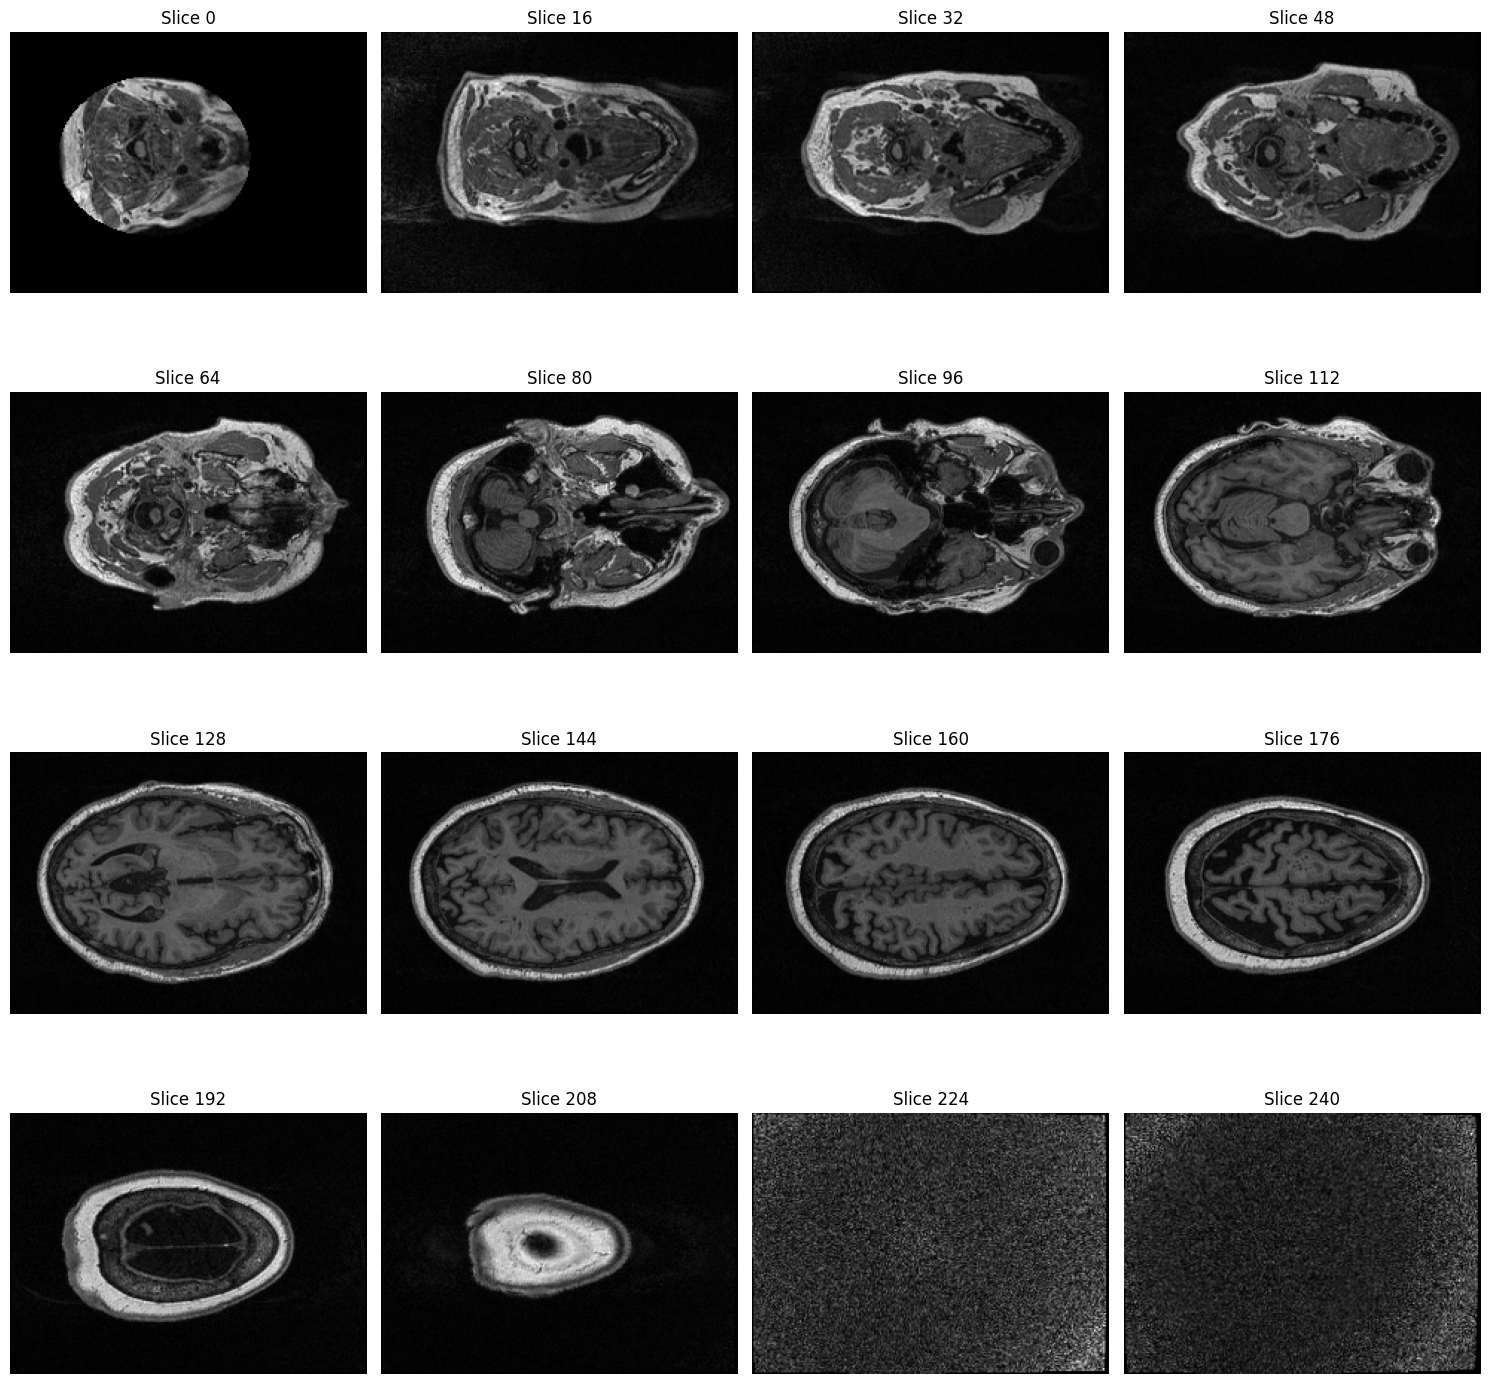

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Assuming 'data' is your 3D numpy array from the MRI .nii file

# Define the grid size you want, e.g., 4x4
grid_size = (4, 4)
fig, axs = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))

# Total number of slices to display
total_slices = grid_size[0] * grid_size[1]

# Calculate the step to evenly sample slices
step = data.shape[2] // total_slices

for i, ax in enumerate(axs.flat):
    slice_no = i * step
    ax.imshow(data[:, :, slice_no], cmap='gray')
    ax.set_title(f'Slice {slice_no}')
    ax.axis('off')

plt.tight_layout()
plt.show()